In [6]:
%config Completer.use_jedi = False  # enable code auto-completion
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #data visualization library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  # evaluation metrics

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# read data points from csv
df = pd.read_csv('/notebooks/ml2025/Indian_water_data.csv')
# drop not needed columns
df.drop(df.columns[[0,1,2,3,4,21,22]],axis=1,inplace=True)
# rename columns for convenient use
df.columns = ['temp-max','temp-min','do-min','do-max','ph-min','ph-max','conductivity-min','conductivity-max','bod-min','bod-max','nitrate-min','nitrate-max','fecal-min','fecal-max','totalcoli-min','totalcoli-max']
df.dropna(inplace=True)
df.head(1000)

,temp-max,temp-min,do-min,do-max,ph-min,ph-max,conductivity-min,conductivity-max,bod-min,bod-max,nitrate-min,nitrate-max,fecal-min,fecal-max,totalcoli-min,totalcoli-max
24,17.0,32.0,4.7,12.4,6.96,8.25,149,710.0,1.4,5.0,2.88,10.44,3,70,120,350.0
25,21.0,31.0,6,7.5,7.32,8.22,215,551.0,1.1,1.8,0.33,2.25,2,5.6,27,79.0
26,21.0,31.0,6.1,7.8,7.36,8.32,216,566.0,1.1,1.9,0.34,2.11,2,2,26,63.0
27,5.0,32.0,5,13.6,7.32,8.86,164,1056.0,1.2,20.4,5.2,14.59,3,280,120,1600.0
28,18.0,32.0,5.5,13.3,7.08,8.27,154,1094.0,1.5,16.8,3.02,16.28,6,170,150,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,25.0,39.0,0.3,6.0,6.70,7.90,1357,1563.0,4,18.0,0.3,1.00,2,11000,2,22000.0
190,25.0,29.0,1.6,6.0,8.50,11.20,599,1043.0,1,5.4,0.9,3.80,2,17,17,280.0
191,25.0,28.0,2.8,6.1,7.50,8.80,522,856.0,1.8,3.2,0.4,17.00,2,2,26,58.0
192,25.0,31.0,0.9,4.6,6.90,8.20,1322,1659.0,4.4,30.0,4.2,8.00,4,46,220,920.0


In [7]:
# change string to numeric values on all columns
df = df.apply(pd.to_numeric, errors='coerce')

# drop NaN values
df.dropna(inplace=True)

# make label column: 1 = safe water and -1 = unsafe water
df['safe'] = ((df['totalcoli-max'] < 200) & (df['fecal-max'] < 200)).astype(int)
df['safe'] = df['safe'].replace(0,-1)

df.head(1000)

,temp-max,temp-min,do-min,do-max,ph-min,ph-max,conductivity-min,conductivity-max,bod-min,bod-max,nitrate-min,nitrate-max,fecal-min,fecal-max,totalcoli-min,totalcoli-max,safe
24,17.0,32.0,4.7,12.4,6.96,8.25,149.0,710.0,1.4,5.0,2.88,10.44,3.0,70.0,120,350.0,-1
25,21.0,31.0,6.0,7.5,7.32,8.22,215.0,551.0,1.1,1.8,0.33,2.25,2.0,5.6,27,79.0,1
26,21.0,31.0,6.1,7.8,7.36,8.32,216.0,566.0,1.1,1.9,0.34,2.11,2.0,2.0,26,63.0,1
27,5.0,32.0,5.0,13.6,7.32,8.86,164.0,1056.0,1.2,20.4,5.20,14.59,3.0,280.0,120,1600.0,-1
28,18.0,32.0,5.5,13.3,7.08,8.27,154.0,1094.0,1.5,16.8,3.02,16.28,6.0,170.0,150,1600.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,25.0,39.0,0.3,6.0,6.70,7.90,1357.0,1563.0,4.0,18.0,0.30,1.00,2.0,11000.0,2,22000.0,-1
190,25.0,29.0,1.6,6.0,8.50,11.20,599.0,1043.0,1.0,5.4,0.90,3.80,2.0,17.0,17,280.0,-1
191,25.0,28.0,2.8,6.1,7.50,8.80,522.0,856.0,1.8,3.2,0.40,17.00,2.0,2.0,26,58.0,1
192,25.0,31.0,0.9,4.6,6.90,8.20,1322.0,1659.0,4.4,30.0,4.20,8.00,4.0,46.0,220,920.0,-1


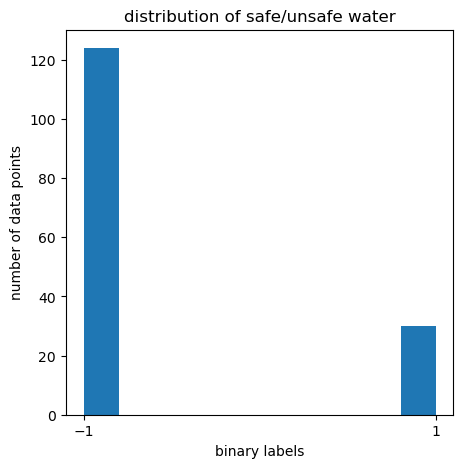

In [8]:
# plot label distribution as a histogram
fig, axes = plt.subplots(figsize=(5, 5))
axes.hist(df['safe'])
axes.set_title('distribution of safe/unsafe water')
axes.set_xlabel("binary labels")
axes.set_ylabel('number of data points')
axes.set_xticks([-1,1])

plt.show()

In [9]:
# predict the model using logistic regression
# use relevant values from do, bod, and fecal
data = df.iloc[:, 0:12].to_numpy()
X = data.reshape(-1, 12)
y = df['safe'].to_numpy()

# split to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model and check its accuracy
reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("The accuracy of the logistic regression is: ", accuracy)

The accuracy of the logistic regression is:  0.7741935483870968


In [10]:
# SVM is scale sensitive, normalise
normalise = StandardScaler()
X_train = normalise.fit_transform(X_train)
X_test = normalise.fit_transform(X_test)

# make model and check accuracy
svm = SVC(kernel="linear", C=100).fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("The accuracy of SVM is: ", accuracy_score(y_test, y_pred))

The accuracy of SVM is:  0.7096774193548387
